## 0. Univariate Linear Regression

In regression in general, we try to fit a function (in the linear case a straight line) to represent an underlying distribution of samples. In the one-dimensional case, this means fitting a straight line through points in a way that minimizes the overall squared error. This is the well-known case of least-squares fitting.

In the following notebook, an example dataset about fuel consumption in 48 US states is used to illustrate the concept.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

We load the data and print the first lines (i.e. samples) of the dataframe to see the variables contained in the dataset.

In [2]:
data = pd.read_csv("us_fuel_consumption.csv")
data.head()

,petrol_tax,avg_income,highway_miles,pct_drivers_license,fuel_consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


Your task is to predict _fuel_consumption_. In univariate regression we use only a single predictor. We plot the variables pairwise against each other in a so called _scatter matrix_.

/Users/ppp/miniconda2/envs/dlmm-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


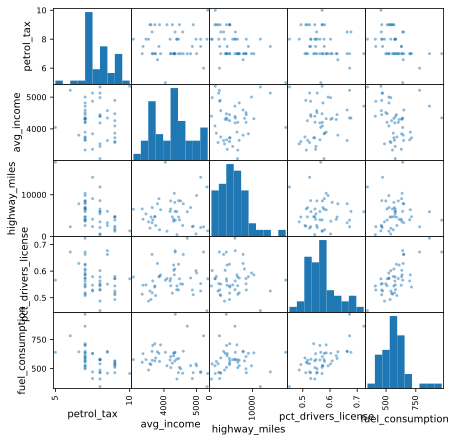

In [3]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0,0,1,1])
pd.plotting.scatter_matrix(data,ax=ax)
plt.show()

__Task:__ Based on the plot choose a single variable as a predictor to estimate the fuel consumption in the 48 US states!
Now, say we take the percent of people with drivers licenses as our predictor variable.
We want to find the line of best fit. 

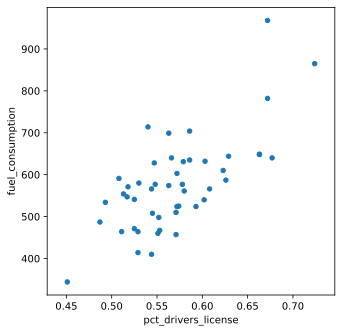

In [4]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0,0,1,1])
data.plot.scatter(x='pct_drivers_license', y='fuel_consumption', ax=ax)
plt.show()

This corresponds to solving the equation 
$\mathbf{y} = b \cdot \mathbf{x} + \mathbf{\epsilon}$, where $\mathbf{x}$ is the predictor, $\mathbf{y}$ the target, $b$ the regression coefficient and $\mathbf{\epsilon}$ the error/noise. Since we have more than 2 points, this is an overdetermined equation for the straight line. What we want to do is find the $b$ for the line that has the minimum overall distance (error) to all points. This is also known as the least-squares fit. 

The error is given as $\mathbf{\epsilon}=\mathbf{y}-\mathbf{\hat{y}}=\mathbf{y}- b \cdot \mathbf{x}$. We want to find $b^{*}$ which minimzes the quadratic error $\mathbf{\epsilon}^T\mathbf{\epsilon}=(\mathbf{y}-b \cdot \mathbf{x})^T(\mathbf{y}- b \cdot \mathbf{x}) = \mathbf{y}^T\mathbf{y} - b \mathbf{x}^T \mathbf{y} - \mathbf{y}^T b \mathbf{x} + b \mathbf{x}^T   \mathbf{x}b$. The derivative with respect to $b$ is given as: $-2\mathbf{x}^T \mathbf{y}+2\mathbf{x}^T \mathbf{x}b$ We set it to zero to find the global minimum and end up with $b^{*} = \frac{\mathbf{x}^T \mathbf{y}}{\mathbf{x}^T \mathbf{x}}$.


In [5]:
# define x and y
x = data['pct_drivers_license'].to_numpy()
y = data['fuel_consumption'].to_numpy()
b = (x.T@y)/(x.T@x)
print("regression coefficient b = %.3f" %b)
y_hat = x*b
mse = np.sum((y-y_hat)**2)/len(y)
print("mean squared error of fit: %.3f" %mse)

regression coefficient b = 1014.945
mean squared error of fit: 6743.321


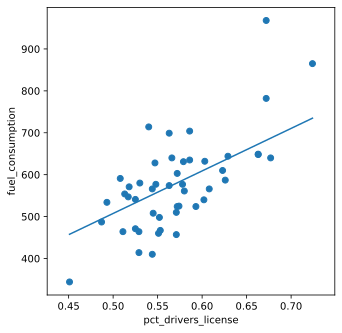

In [6]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0,0,1,1])
plt.scatter(x,y)
plt.plot([x.min(),x.max()],[b*x.min(),b*x.max()])
ax.set_xlabel('pct_drivers_license')
ax.set_ylabel('fuel_consumption')
plt.show()

We used a truely linear model, this means our line of best fit runs through the origin of the x-y plane. In general a affine linear line is better suited in real world cases. But we can translate our data to the origin by subtracting the mean value of $\mathbf{x}$ and $\mathbf{y}$

In [7]:
xc = x-x.mean()
yc = y-y.mean()
b = (xc.T@yc)/(xc.T@xc)
y_hat = xc*b
print("regression coefficient b = %.3f" %b)
mse = np.sum((y-(y_hat+y.mean()))**2)/len(y) #add the mean to the predictions to translate it to the original range
print("mean squared error of fit: %.6f" %mse)

regression coefficient b = 1409.842
mean squared error of fit: 6269.134803


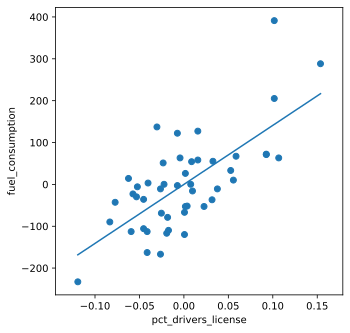

In [8]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0,0,1,1])
plt.scatter(xc,yc)
plt.plot([xc.min(),xc.max()],[b*xc.min(),b*xc.max()])
ax.set_xlabel('pct_drivers_license')
ax.set_ylabel('fuel_consumption')
plt.show()

If we spend a extra variable to our model we end up with an affine line of best fit given as $\mathbf{y} = b_0 + b_1 \cdot \mathbf{x} + \mathbf{\epsilon}$. For an elegant solution we add a dummy feature vector to form the matrix $\mathbf{X}$ as $[\mathbf{x},\mathbf{1}]$ and solve the linear least squares pproblem in matrix form.  

In [9]:
X = np.hstack((np.ones((48,1)),x.reshape(-1,1),))
print(X[:5,:])
print("Shape of X: %i, %i" %X.shape)
b = np.linalg.pinv(X)@y
y_hat = X@b
print("intercept b0 = %.3f" %b[0])
print("regression coefficient b1 = %.3f" %b[1])
mse = np.sum((y-y_hat)**2)/len(y)
print("mean squared error of fit: %.3f" %mse)

[[1.    0.525]
 [1.    0.572]
 [1.    0.58 ]
 [1.    0.529]
 [1.    0.544]]
Shape of X: 48, 2
intercept b0 = -227.309
regression coefficient b1 = 1409.842
mean squared error of fit: 6269.135


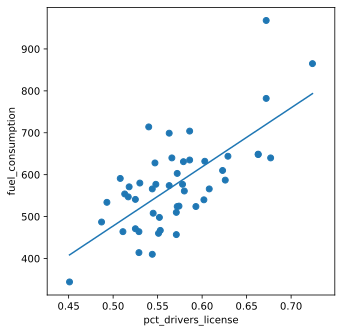

In [10]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0,0,1,1])
plt.scatter(x,y)
plt.plot([x.min(),x.max()],[b[0]+b[1]*x.min(),b[0]+b[1]*x.max()])
ax.set_xlabel('pct_drivers_license')
ax.set_ylabel('fuel_consumption')
plt.show()